In [1]:
%matplotlib inline

In [2]:
from ssf_code import *

In [3]:
sd.query_devices()

  0 Built-in Microphone, Core Audio (2 in, 0 out)
  1 Built-in Output, Core Audio (0 in, 2 out)
  2 UA-25 48kHz, Core Audio (2 in, 2 out)
* 3 Aggregate Device, Core Audio (2 in, 2 out)

* Back to [Introduction](./01_Signals_Sound_and_Filters_Intro.ipynb)

*The mathematician's son got older and asked his father "Dad, what is a Discrete Fourier Transform?" to which the mathematician joyfuly answered "It's just like a discrete cosine transformation, but the DFT uses the exponential function, my boy!"*

### ACT II, Chapter III
# 3.0 PREFACE
*The analysis problem is the inverse of the synthesis problem.*

This project will NOT dive too deep into the mathematics of the subject. A path to follow if one has to better understand the nature of DCT and DFT can be a lengthy study of its own. It includes:
* matrices - orthogonality and transposition for "fast and easy" computation of discrete cosine transformations, and unitary matrices multiplication for the DFT;
* [exponential function](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_ExponentialFunction.html) - for DFT computation;
* integral computation - for the Fourier analysis as a comparison of pointwise products;
* Heisenberg uncertainty principle - well, thats a bit of a leap in a completely different ocean, but I found myself understanding the window function and a spectrogram's resolution trough that principle :/

All in all this is why this topic can be a bit of a hurdle to understand and to get right. There are many therms that overlap in meaning, or mean entirely something else when viewed from a different point of view. Like *sampling* and *discrete-time*. In this day and age these therms imply a work within a digital domain(computers), but that's not always the case here.

And I can argue that we all live and exist in a completely *discrete-time universe*, but we call it "continuous" because we can't even imagine the Planck-time and Plank-length. But to that argument Pandora would say "let's not think outside that box, mine is safer".

# 3.1 FOURIER ANALYSIS

In mathematics, Fourier analysis is the study of the way general functions may be represented as or approximated by sums of simpler trigonometric functions. Fourier analysis grew from the study of Fourier series, and is named after Joseph Fourier, who showed that representing a function as a sum of trigonometric functions greatly simplifies the study of heat transfer.

Today, the subject of Fourier analysis encompasses a vast spectrum of mathematics. The process of decomposing a function into oscillatory components is often called Fourier analysis, while the operation of rebuilding the function from these pieces is known as Fourier synthesis. In mathematics, the term Fourier analysis often refers to the study of both operations. The decomposition process itself is called a Fourier transformation.

In the context of this study, a way to better understand a given signal is to decompose it into building blocks. These blocks are more accessible for the subsequent processing. In the case that these building blocks consist of sinusoidal functions, the process is called Fourier analysis.

Sinusoidal functions are special in the sense that they possess an explicit physical meaning in terms of frequency. As a consequence, the resulting decomposition unfolds the frequency spectrum of the signal - similar to a prism that can be used to break light up into its constituents spectral colors.

### **The Fourier transform converts a signal that depends on time into a representation that depends on frequency.**

The purpose of a Fourier Transformation is to transform waveform(impulse response/waveform) into frequency. Simple as that. Well, not really. The mathematics behind this fundamental tool in signal processing is profound, beautiful and elegant. And complex. Did I mention complex? I mean *very* complex. And not like *complex numbers* complex. REALLY complex. Thankfully we have NumPy that'll make the calculations. 

Different signal classes lead to different versions of the Fourier transform. These versions are iterated and approximated by means of the **Discrete Fourier Transform(DFT)**. The DFT can be computed efficiently by means of the algorithm called **Fast Fourier Transform(FFT)**. And then there's the **Short Time Fourier Transform(STFT)**, which is a local variant of the Fourier transform that yields a *time-frequency* representation of a signal.

### Missing the time information of the Fourier transform illustrated by two different signals and their magnitude Fourier transforms:

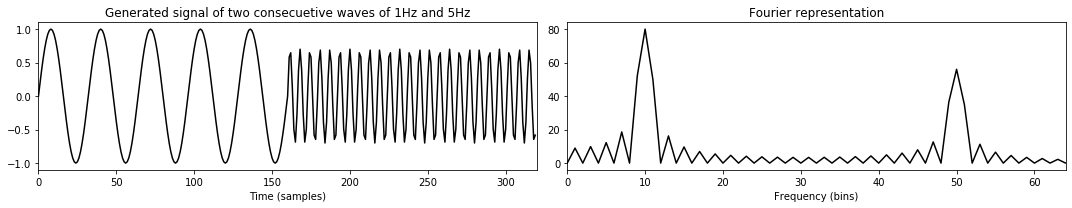

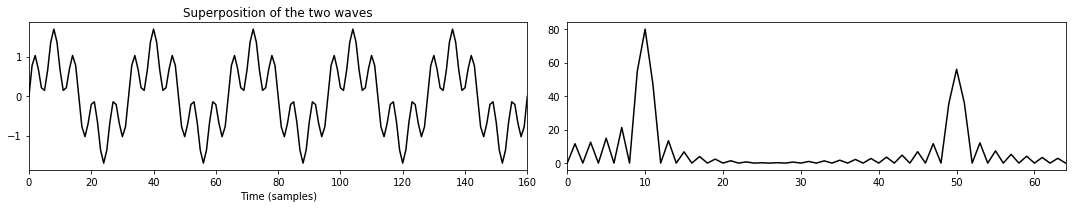

In [4]:
x1 = make_wave(1, 32, 5, 1)
x2 = make_wave(5, 32, 5, .7)
x_conc = np.concatenate((x1[0], x2[0]))
x_sum = np.concatenate((x1[0]+x2[0], np.zeros(len(x2[0]))))
F_xc = np.abs(np.fft.fft(x_conc))
F_xs = np.abs(np.fft.fft(x_sum[:]))

plt.figure(figsize=(15, 3))
ax1 = plt.subplot(1, 2, 1)
plt.plot(x_conc, c='k')
decorate(title='Generated signal of two consecuetive waves of 1Hz and 5Hz', xlabel='Time (samples)', xlim=[0, 320])
plt.subplot(1, 2, 2)
plt.plot(F_xc, c='k')
decorate(title='Fourier representation', xlabel='Frequency (bins)', xlim=([0, 64]))
plt.figure(figsize=(15, 3))

ax2 = plt.subplot(1, 2, 1)
plt.plot(x_sum, c='k')
decorate(title='Superposition of the two waves', xlabel='Time (samples)', xlim=[0,160])
plt.subplot(1, 2, 2)
plt.plot(F_xs, c='k')
decorate(xlim=([0, 64]))
plt.tight_layout()
plt.show()

# [3.2 THE FOURIER TRANSFORM](https://www.youtube.com/watch?v=spUNpyF58BY) IN A NUTSHELL

The basis for the Fourier transformation is the fact that every (infinite) periodic signal can be described by an infinite harmonics series.

The signal can be resolved into a set of constituents based upon the fundamental frequency. Each of these constituents contains information on both amplitude and phase. The periodic signal has a discrete frequency spectrum, where the distance between each of the lines in the spectrum corresponds to the fundamental frequency.
However, not all signals are periodic. Non-periodic signals do not repeat themselves. One can, however, establish the convention that the periodic signal constitutes a single period within the space of time under consideration. As a basis, the space of time under consideration is infinitely large. This in turn leads to the distance between the frequency lines in the corresponding spectrum being infinitely small. It can also be expressed in this manner: 
$$\Delta\omega = \frac{1}{T}$$ Where $\Delta\omega $ is the fundamental frequency, $T$ is the period. Hence if $T \rightarrow \infty \Rightarrow \Delta\omega \rightarrow 0$ It thus no longer involves a discrete spectrum, but rather a continuous spectrum.

The main idea of **Fourier analysis** is to compare the (input) signal with sinusoids of various frequencies ($\nu\in\mathbb{R}$ in Hz). Each such sinusoid or pure tone may be thought as a prototype oscillation. As a result, for each considered frequency parameter $\nu$, we obtain a magnitude coefficient $d_{\nu}\in\mathbb{R}_{\geq0}$ (along with a phase coefficient, that we will once again ignore). If the result of the comparison returns a large coefficient $d_\nu$, that means that there's a high similarity between the input signal and the sinusoid of frequency $\nu$ and that the input signal contains a periodic oscillation at that frequency. If the $d_\nu$ is small, the input signal doesn\'t contain a periodic component at that frequency.

The basic idea is to use these coefficients as polar coordinates and to encode both as a single complex number. Some additional factors must be introduced to yield the complex coefficient: $$c_\nu:= \frac{d_\nu}{\sqrt{2}}\cdot\exp(2\pi i(-\varphi_\nu))$$
This collection of coefficients can be encoded by a complex-valued function $\hat{f}:\mathbb{R}\rightarrow\mathbb{C}$ which assigns to each frequency parameter the coefficient $c_\nu$:
$$\hat{f}(\nu):=c_\nu$$
The function $\hat{f}$ is referred to as the **Fourier transform** of $f$, and its values $\hat{f}(\nu)=c_\nu$ are called **Fourier coefficients**. I'm using $\nu$ for the frequency here, but it's common to meet the formula with $\omega$ instead.

# 3.3 [DISCRETE FOURIER TRANSFORM](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C2/C2_DFT-FFT.html)

Computing the Fourier transform of signals involves the evaluation of integrals or infinite sums, which is, in general, computationally infeasible. In practice, as we typically approximate the Fourier transform by finite sums. Furthermore, the Fourier transform is evaluated only for a finite number of frequencies. I won't be showing how the finite sums and the Fourier coefficients must be chosen to obtain the linear transform known as the **discrete Fourier transform**(DFT). The important point is that the DFT can be computed efficiently by means of an algorithm - the **fast Fourier transform**(FFT). 

Remember how we have a continuous-time and a discrete-time? Guess in which domain operates the DFT. The discrete Fourier transform (DFT) converts a finite sequence of equally-spaced samples of a function into a same-length sequence of equally-spaced samples of the discrete-time Fourier transform (DTFT). And we're still talking about computations outside the digital domain of the computers.



## 3.3.1 DISCRETE-TIME FOURIER TRANSFORM

The discrete-time Fourier transform (DTFT) is a form of Fourier analysis that is applicable to a sequence of values.

The DTFT is often used to analyze samples of a continuous function. The term discrete-time refers to the fact that the transform operates on discrete data, often samples whose interval has units of time. From uniformly spaced samples it produces a function of frequency that is a periodic summation of the continuous Fourier transform of the original continuous function. Under certain theoretical conditions, described by the sampling theorem, the original continuous function can be recovered perfectly from the DTFT and thus from the original discrete samples. The DTFT itself is a continuous function of frequency, but discrete samples of it can be readily calculated via the discrete Fourier transform (DFT).

# 3.3 DFT (cont.)

By definition, the DFT is the mapping $\mathbb{C}^N\rightarrow\mathbb{C}^N$ that maps the input vector **x** to the output vector **X**. This is a linear mapping, which(by means of the primitive $N^{th}$ root of unity and some black magic) yields the famous matrix: 
$$
\mathrm{DFT}_N =
\begin{pmatrix}
    1 & 1 & 1 & \dots  & 1 \\
    1 & \omega & \omega^2 & \dots  & \omega^{N-1} \\
    1 & \omega^2 & \omega^4 & \dots  & \omega^{2(N-1)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    1 & \omega^{N-1} & \omega^{2(N-1)} & \dots  & \omega^{(N-1)(N-1)} \\
\end{pmatrix}
$$

In short, the Fourier transform $\hat{x}$ of a DT-signal $x$ of finite length $N$ can be computed(for frequencies $\omega = k/N, k\in [0:N-1]$) by a single matrix-vector product $X=DFT_N\cdot x$.

To get moving forward, we'll assume that the analog signal $f$ satisfies suitable requirements so that the sampled signal $x$ doesn't contain major artifacts. Now, having a discrete number of samples to represent our input signal, to calculate the Fourier transform one needs to dig deep into some great math - integration in the analog domain becomes summation in the discrete domain, the sampling period $T$ gets mixed up in some approximations(**Riemann sum**), or in our case - to use numpy. The definition of  a discrete version of the Fourier transform for a given DT-signal $x:\mathbb{Z}\rightarrow\mathbb{R}$ is set to be:
$$\hat{x}(\omega):=\sum_{n\in\mathbb{Z}}x(n)exp(-2\pi i\omega n)$$

But computations on computers raises some problems. One problem is that that sum involves an infinite number of summands, another problem is that the frequency parameter $\omega$ is a continuous parameter. For both problems, there are some pragmatic solutions. The solutions I met raised more problems, and I'll go on a bit of a rant here:

Regarding the first problem we assume that most of the relevant information of the input analog signal $f$ is limited to a certain duration in time. That conflicts with the requirement of $f$ being band limited. A mathematical fact states that there are no functions that are both limited in frequency(bandlimited) and limited in time(having finite duration). Rant over.

I'll omit the formula for DFT, but I'll make an important assertion about the number of computations. It's a large number. In particular when the required frequency resolution is high.  The number of operation is of order $N^2$ where $N$ is the frequency resolution(number of samples). That's where the FFT comes to the rescue.

# 3.4 FAST FOURIER TRANSFORMATION

Note that the usual computation of the matrix-vector product $X=DFT_N\cdot x$ requires $O(N^2)$ multiplications and additions, which too many for most applications. For example, having a signal with 100 samples($N=10^3$) would require already a number of operations on the order of a million($N^2=10^6$). In many cases one has to deal with much larger $N\gg10^5$, which makes a naive computation of a DFT infeasible. The good news is that the DFT matrix is highly structured, which can be exploited when computing a matrix-vector product. The main idea lies in a factorization of the DFT matrix into a product of $O(\log{N})$ sparse matrices, each of which can be evaluated with $O(N)$ operations. This leads to an efficient algorithm, the so called *fast Fourier transform**(FFT), which only requires $O(N\log{N})$ multiplications and additions.

As I mentioned few times already, the Fast Fourier Transformation is the efficient algorithm for computation of DFT, or its inverse (IDFT). But it is a common mistake to infer to the one or the other interchangeably. There's another omission that I've made so far, but it's time to face the music. The FFT is a set of algorithms. Not a single one. I know, shock and horror. There are algorithms by Gauss, Prime-factor FFT algorithm, Bruun's FFT algorithm, Rader's FFT algorithm, Bluestein's FFT algorithm, and Hexagonal fast Fourier transform and a few more obscure ones. I won't go into detail about all of these, of course. But focus on the idea in general and on the most famous and most widely used FFT algorithm - the Cooley–Tukey one. The best known use of the Cooley–Tukey FFT algorithm is to divide the transform into two pieces of size N/2 at each step, and is therefore limited to power-of-two sizes, but any factorization can be used in general.

FFT is in principle a sampled version of the continuous spectrum. What is most significant about FFT is that the calculation can be performed rapidly when, in each block of samples $N$(also called frame), $2^n$ samples are selected, where $n$ is an integer. Thus number of samples can be 2, 4, 8, 16 ... 2-48, ect.

The sampling frequency is crucial to the frequency resolution of the signal. Thus in practice a sampling frequency is chosen, so the fundamental sampling rule is adhered to(the rule about the doubling of the highest frequency one wants to reproduce).

It is the combination of the sampling frequency(sampling rate) and the number of samples(FFT size) in a frame that determines the frequency resolution in the spectrum. The relationship is described in the following expression:
$$\omega_{res} = \frac{\omega_s}{N}$$ where $\omega_{res}$ is the resolution frequency in $Hz$, $\omega_s$ is the sampling frequency in $Hz$, and $N$ is the number of samples (FFT size).

In the spectrum, all frequencies can be represented in the lines displayed, but if a more detailed display is desire then a higher resolution must be used with fewer cycles between the values. This is done by reducing the sampling frequency(and also the upper boundary frequency) or by increasing the number of samples per frame(FFT size).

# 3.5 WINDOW FUNCTION

I'll jump ahead a bit and take a step towards this thing. When an analysis is performed of an extract of a signal of longer duration, errors will arise in the analysis if a "softening" is not performed of the transitions between boundaries. Remember the abrupt start and ending of a sinusoidal wave and how it got to sound better after a "fade in" and "fade out"? Also, the artifacts we get from aliasing? For the discrete slice of the signal we're applying FFT, these problems arise in a similar manner and are solved by a sort of a "fade" function applied to that slice.

This is called **data window function**. Each sample in the selected portion of the signal(each frame) is multiplied by a corresponding sample in the data window function(multiplication of numpy arrays in python).


I will not mention **Convolution theorem**... Nope. I will not.

The following cell will show a generation of a chirp signal(a frequency sweep) and its Fourier transform.

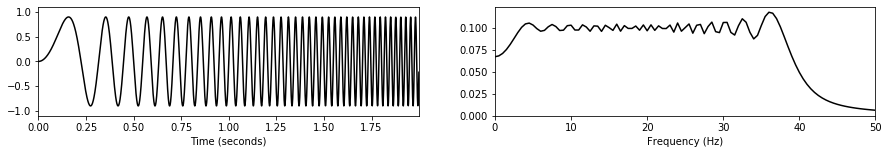

In [5]:
duration = 2.0
Fs = 1024
omega = 10
N = int(duration * Fs)
t = np.arange(N) / Fs
x = 0.9 * np.sin(2 * np.pi * omega * t**2)
plt.figure(figsize=(15, 2))

plt.subplot(1, 2, 1)
plt.plot(t, x, c='k')

plt.xlim([t[0], t[-1]])
plt.ylim([-1.1, 1.1])
plt.xlabel('Time (seconds)')
plt.subplot(1, 2, 2)
X = np.abs(np.fft.fft(x)) / N * 2
freq = np.fft.fftfreq(N, d=1/Fs)
X = X[:N//2]
freq = freq[:N//2]
plt.plot(freq, X, c='k')
plt.xlim([0, 50])
plt.ylim(bottom=0)
plt.xlabel('Frequency (Hz)');

And in the next cell we'll get to see what each windowing function does to the Fourier transform of the chirp. This will become a much clearer picture in the coming **Short-time Fourire transform**(STFT) part.

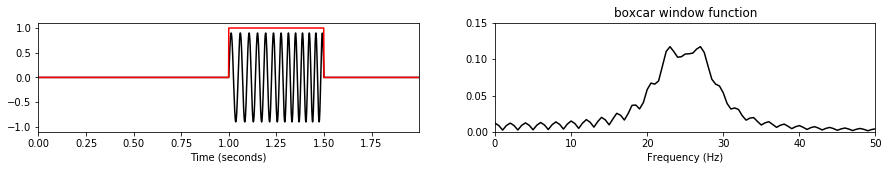

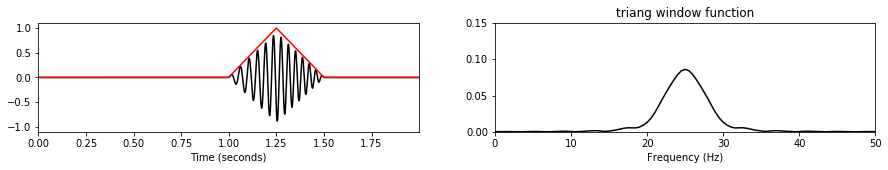

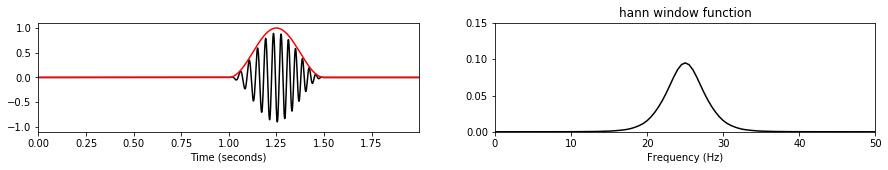

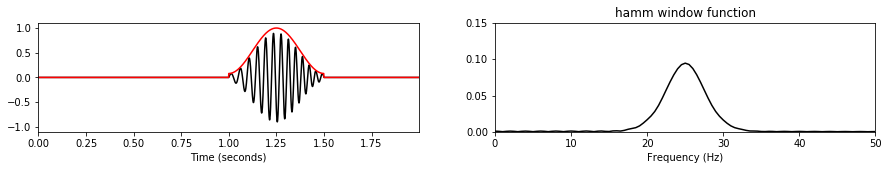

In [6]:
def windowed_ft(t, x, Fs, w_pos_sec, w_len, w_type, upper_y=1.0):
    
    N = len(x)
    w_pos = int(Fs * w_pos_sec)
    w = np.zeros(N)
    w[w_pos:w_pos + w_len] = scipy.signal.get_window(w_type, w_len)
    x = x * w
    
    plt.figure(figsize=(15, 2))

    plt.subplot(1, 2, 1)
    plt.plot(t, x, c='k')
    plt.plot(t, w, c='r')
    plt.xlim([min(t), max(t)])
    plt.ylim([-1.1, 1.1])
    plt.xlabel('Time (seconds)')

    plt.subplot(1, 2, 2)
    X = np.abs(np.fft.fft(x)) / N * 2
    freq = np.fft.fftfreq(N, d=1/Fs)
    X = X[:N//2]
    freq = freq[:N//2]
    plt.plot(freq, X, c='k')
    plt.xlim([0, 50])
    plt.ylim([0, upper_y])
    plt.title(f"{w_type} window function")
    plt.xlabel('Frequency (Hz)')
    
w_len = 512
w_pos = 1280

windowed_ft(t, x, Fs, 1.0, w_len, 'boxcar', upper_y=0.15)
windowed_ft(t, x, Fs, 1.0, w_len, 'triang', upper_y=0.15)
windowed_ft(t, x, Fs, 1.0, w_len, 'hann', upper_y=0.15)
windowed_ft(t, x, Fs, 1.0, w_len, 'hamm', upper_y=0.15)

# 3.6 SHORT-TIME FOURIER TRANSFORM

That is it! We're almost there! The last acronym we'll meet here is the **STFT - Short-time Fourier transform** 

The Fourier transform $\hat{f}$ of a signal $f\in L^2\mathbb{R}$ describes the frequency content of the signal. Comparing the signal with a periodic exponential function $t \to \exp(2\pi i \omega t)$ results in a coefficient $\hat{f}(\omega)$ that exhibits the overall intensity of oscillations at $\omega$ Hz occurring in the signal. However, because of the nonlocal nature of the analysis function, the frequency information is always averaged over the entire time domain. Sudden changes and local variations of the signal such as the beginning and the end of events cannot be detected well by the Fourier transform. Local phenomena of the signal become global phenomena in the Fourier transform. In contrast, small changes in the phase of the Fourier transform can have considerrable effects in the time domain.

To remedy the drawbacks of the Fourier transform, Dennis Gabor introduced in 1946 the modified Fourier transform, now known as the STFT. This transform is a compromise between a time- and frequency-based representation, determining the sinusoidal frequency and phase content of local sections of a signal as it changes over time. In this way the STFT doesn't only tell which frequencies are "contained" in the signal, but also at which points in times or, to be more precise, in which time intervals these frequencies appear. From the STFT one can derive a spectrogram, which visually represents the time-frequency content of a signal.

For a given signal, we want to find a transform that exhibits the frequency content of $f$ in a neighborhood of each point in time $t$. The basic idea is to consider only a small section of the signal around a point $t$, where the influence of a point within the section decreases with increasing the distance form $t$. Mathematically, this weighting is modeled by multiplying the signal with a **window function**.

# 3.7 ROLE OF THE WINDOWING FUNCTION

We now discuss the role of the window function $g$, which plays an important role from a signal processing point of view. Typically, a window function is chosen to be zero-valued outside of some chosen section, so that when the signal is multiplied by the window function, the product is also zero-valued outside the section. The finite-length signal that is left can be regarded as a "viewed through the window". We now know that STFT depends on both the signal as well as the window function, although one is typically interested in the signal's properties. The design of suitable window function and their influence is a science by itself, which is outside the scope of the current project.

The seemingly simplest way to obtain a local view on the signal is to leave it unaltered within the desired section(window) and to set all values to zero outside the section. Such localization is realized by a **rectangular(boxcar) window**

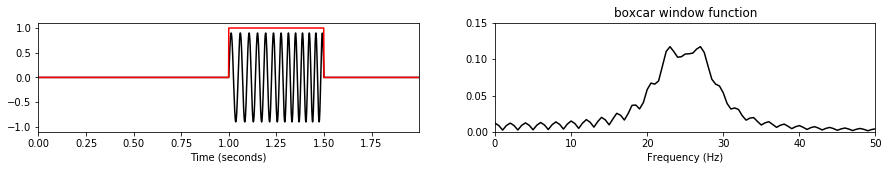

In [7]:
windowed_ft(t, x, Fs, 1.0, w_len, 'boxcar', upper_y=0.15)

However, using this windowing has major drawbacks, since it generally leads to discontinuities at the section's boundaries. As we already know, such abrupt changes and local variations of the signal(such as the beginning and the end) cannot be detected well by the Fourier transform. This leads to artifacts due to interferences which are spread over the entire frequency spectrum.

To attenuate the boundary effects, one often uses windows that are nonnegative within the desired section an continuously fall to zero towards the section's boundaries. The examples from the previous part should now make more sense, right?

[And now to make a fun experiment with the phase of a signal](./07_Signals_Sound_and_Filters_A3.ipynb)